## Credit EDA Case Study

### Intoduction

This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.We have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### 1. Import Necessary Libraries

In [1]:
# Import the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_colwidth',-1)
pd.set_option('float_format','{:f}'.format)

### 2. Reading The Dataset

In [3]:
# Reading the application_data csv file
app_dt = pd.read_csv(r"C:\Users\SANKET\Desktop\Sanket Bhuwad Upgrad\Course I - Data Toolkit\Credit EDA Case Study\application_data.csv")
app_dt.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,NaN,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

In [4]:
# Shape of Dataset
app_dt.shape

(307511, 122)

The dataset consists of 307511 rows and 122 columns.

In [5]:
# Print the information about the attributes of application_data
app_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

From this we can see that 16 variables are categorical variables and the rest are numerical variables.

In [6]:
# Describe numerical columns in application_data
app_dt.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,306851.000000,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,0.514393,0.510853,0.117440,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.08795

### 3. Cleaning The Dataset

In [7]:
# Null values in each column
app_dt.isnull().sum()

SK_ID_CURR                      0     
TARGET                          0     
NAME_CONTRACT_TYPE              0     
CODE_GENDER                     0     
FLAG_OWN_CAR                    0     
FLAG_OWN_REALTY                 0     
CNT_CHILDREN                    0     
AMT_INCOME_TOTAL                0     
AMT_CREDIT                      0     
AMT_ANNUITY                     12    
AMT_GOODS_PRICE                 278   
NAME_TYPE_SUITE                 1292  
NAME_INCOME_TYPE                0     
NAME_EDUCATION_TYPE             0     
NAME_FAMILY_STATUS              0     
NAME_HOUSING_TYPE               0     
REGION_POPULATION_RELATIVE      0     
DAYS_BIRTH                      0     
DAYS_EMPLOYED                   0     
DAYS_REGISTRATION               0     
DAYS_ID_PUBLISH                 0     
OWN_CAR_AGE                     202929
FLAG_MOBIL                      0     
FLAG_EMP_PHONE                  0     
FLAG_WORK_PHONE                 0     
FLAG_CONT_MOBILE         

In [8]:
# Percentage of null values in each column
null_perc = app_dt.isnull().sum()/len(app_dt)*100

In [9]:
null_perc.sort_values(ascending = False).head(60)

COMMONAREA_MEDI                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MODE                69.872297
NONLIVINGAPARTMENTS_MODE       69.432963
NONLIVINGAPARTMENTS_AVG        69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
FONDKAPREMONT_MODE             68.386172
LIVINGAPARTMENTS_MODE          68.354953
LIVINGAPARTMENTS_AVG           68.354953
LIVINGAPARTMENTS_MEDI          68.354953
FLOORSMIN_AVG                  67.848630
FLOORSMIN_MODE                 67.848630
FLOORSMIN_MEDI                 67.848630
YEARS_BUILD_MEDI               66.497784
YEARS_BUILD_MODE               66.497784
YEARS_BUILD_AVG                66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_MEDI                  59.376738
LANDAREA_MODE                  59.376738
LANDAREA_AVG                   59.376738
BASEMENTAREA_MEDI              58.515956
BASEMENTAREA_AVG               58.515956
BASEMENTAREA_MODE              58.515956
EXT_SOURCE_1                   56.381073
NONLIVINGAREA_MO

In [10]:
# List of columns where null values percentange count is more than 40%
null_col = app_dt.isnull().sum()
null_col = null_col[null_col.values>(0.4*len(app_dt))]
len(null_col)


49

There are 49 columns having null value more than 40%

- We can remove those values as it will be difficult to EDA with this much amount of null values

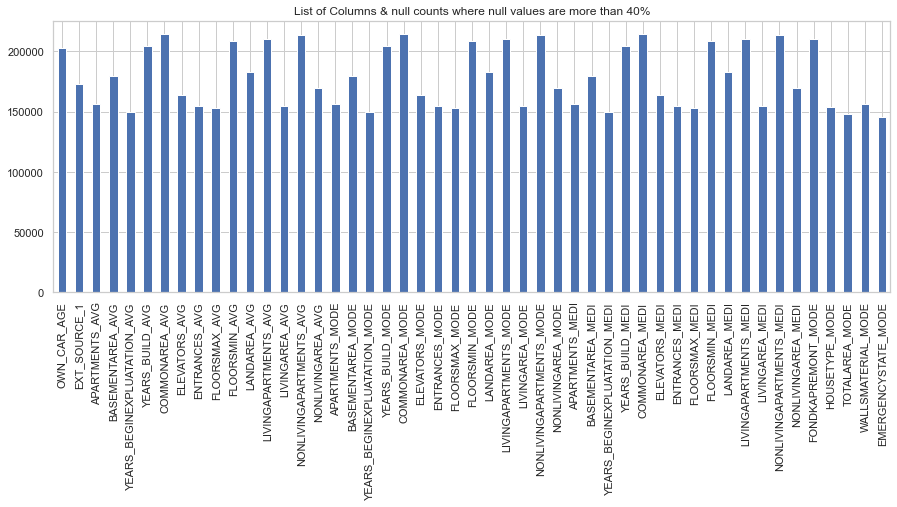

In [11]:
# Bar graph of columns having null values more than 40%
plt.figure(figsize=(15,5))
null_col.plot.bar()
plt.title('List of Columns & null counts where null values are more than 40%')
plt.show()

In [12]:
# Remove the columns where null values percentage is more than 40%
null_col = list(null_col[null_col.values>=0.4].index)
app_dt.drop(null_col,axis=1,inplace=True)

In [13]:
# Checking shape of dataframe once again
app_dt.shape

(307511, 73)

- Old dataset rows,columns (307511, 122)

- New dataset rows,columns (307511, 73)

Now,we have 73 columns having less or no null values 

In [14]:
# Checking the % of null values for each column in new dataset
null = app_dt.isnull().sum()/len(app_dt)*100
null.sort_values(ascending = False).head(18)

OCCUPATION_TYPE              31.345545
EXT_SOURCE_3                 19.825307
AMT_REQ_CREDIT_BUREAU_YEAR   13.501631
AMT_REQ_CREDIT_BUREAU_QRT    13.501631
AMT_REQ_CREDIT_BUREAU_MON    13.501631
AMT_REQ_CREDIT_BUREAU_WEEK   13.501631
AMT_REQ_CREDIT_BUREAU_DAY    13.501631
AMT_REQ_CREDIT_BUREAU_HOUR   13.501631
NAME_TYPE_SUITE              0.420148 
OBS_30_CNT_SOCIAL_CIRCLE     0.332021 
DEF_30_CNT_SOCIAL_CIRCLE     0.332021 
OBS_60_CNT_SOCIAL_CIRCLE     0.332021 
DEF_60_CNT_SOCIAL_CIRCLE     0.332021 
EXT_SOURCE_2                 0.214626 
AMT_GOODS_PRICE              0.090403 
AMT_ANNUITY                  0.003902 
CNT_FAM_MEMBERS              0.000650 
DAYS_LAST_PHONE_CHANGE       0.000325 
dtype: float64

In [15]:
less_null = null> 0
less_null[less_null.values == True].shape

(18,)

Now, we left with 18 columns having few null values

#### To go further with analysis, we can impute missing values in columns


Lets check values in OCCUPATION_TYPE

In [16]:
app_dt.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants              9813 
Medicine staff           8537 
Security staff           6721 
Cooking staff            5946 
Cleaning staff           4653 
Private service staff    2652 
Low-skill Laborers       2093 
Waiters/barmen staff     1348 
Secretaries              1305 
Realty agents            751  
HR staff                 563  
IT staff                 526  
Name: OCCUPATION_TYPE, dtype: int64

We can impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers'

In [17]:
app_dt.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

From the Countplot we see most of the customers occupation is 'Laborers'

In [18]:
#Fill null values for 'OCCUPATION_TYPE' with mode
app_dt['OCCUPATION_TYPE'].fillna(app_dt['OCCUPATION_TYPE'].mode()[0], inplace=True)

Values in EXT_SOURCE_3 & EXT_SOURCE_2


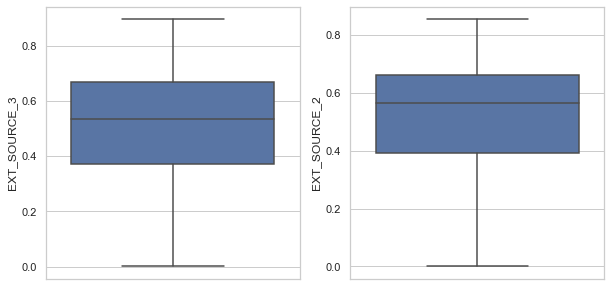

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax=axes[0],data=app_dt,y='EXT_SOURCE_3')
sns.boxplot(ax=axes[1],data=app_dt,y='EXT_SOURCE_2')

plt.show()

This variables does not have any outliers and the null places can be imputed with the mean value.

In [20]:
app_dt[['EXT_SOURCE_3','EXT_SOURCE_2']].describe()

,EXT_SOURCE_3,EXT_SOURCE_2
count,246546.000000,306851.000000
mean,0.510853,0.514393
std,0.194844,0.191060
min,0.000527,0.000000
25%,0.370650,0.392457
50%,0.535276,0.565961
75%,0.669057,0.663617
max,0.896010,0.855000


In [21]:
app_dt['EXT_SOURCE_3'].fillna(app_dt['EXT_SOURCE_3'].mean(), inplace=True)

In [22]:
app_dt['EXT_SOURCE_2'].fillna(app_dt['EXT_SOURCE_2'].mean(), inplace=True)

#### Number of Credit Enquiries

These all are number of credit inquiries.We come to know that these columns consists of same number of null values (41519).

- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR

In [23]:
cre_enq = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

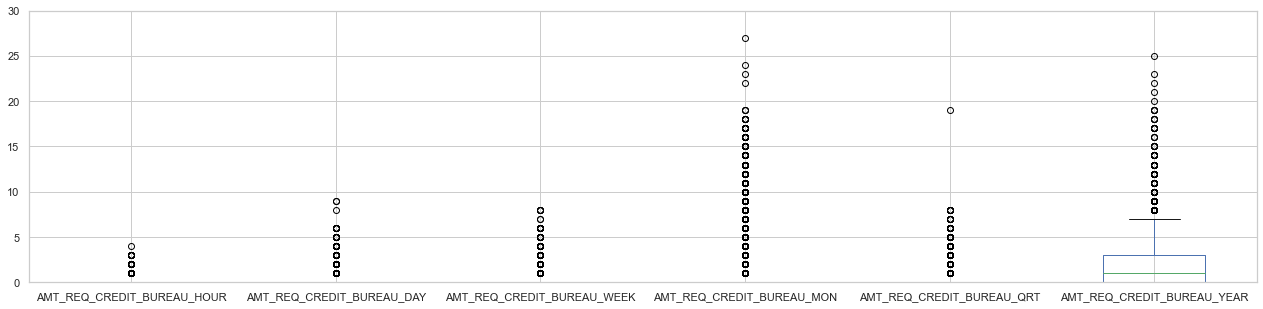

In [24]:
app_dt[cre_enq].plot.box(figsize=(22,5))
plt.ylim(0,30)
plt.show()

From the box plot,we come to know that outliers are present for the values in these columns.

**So,we can impute mode value which is '0.0'.replacing missing values with the mode value would make more sense.**

In [25]:
app_dt[cre_enq].mode()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
app_dt[cre_enq].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [27]:
app_dt[cre_enq].fillna(app_dt[cre_enq].mode(),inplace=True)

For the column NAME_TYPE_SUITE we can impute mode value which is 'Unaccompanied'. Since most of the clients do not have an accompanying person when applying for a loan

In [28]:
app_dt.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family             40149 
Spouse, partner    11370 
Children           3267  
Other_B            1770  
Other_A            866   
Group of people    271   
Name: NAME_TYPE_SUITE, dtype: int64

In [29]:
app_dt.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

In [30]:
app_dt['NAME_TYPE_SUITE'].fillna(app_dt['NAME_TYPE_SUITE'].mode()[0], inplace=True)

#### Social Surrounding Count
The following columns have 1021 null values each and give information about the defaulting nature of the client's social surroundings:
- OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE

In [31]:
soc_sr_cnt = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
app_dt[soc_sr_cnt].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


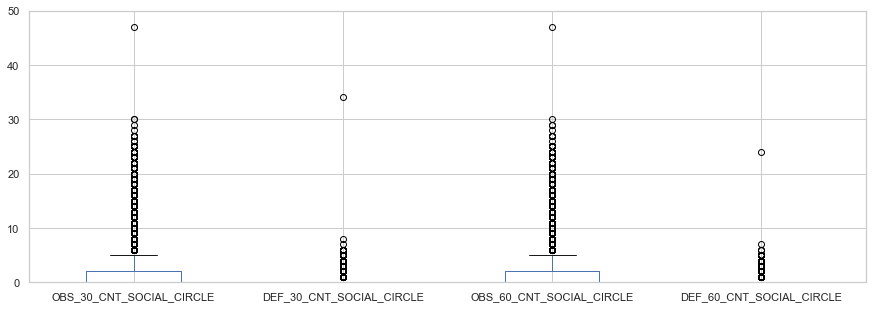

In [32]:
app_dt[soc_sr_cnt].plot.box(figsize=(15,5))
plt.ylim(0,50)
plt.show()

From the box plot we see outliers are present in this columns and hence median should be imputed to null values.Median of these columns is '0' 

In [33]:
app_dt[soc_sr_cnt].median()

OBS_30_CNT_SOCIAL_CIRCLE   0.000000
DEF_30_CNT_SOCIAL_CIRCLE   0.000000
OBS_60_CNT_SOCIAL_CIRCLE   0.000000
DEF_60_CNT_SOCIAL_CIRCLE   0.000000
dtype: float64

In [34]:
app_dt[soc_sr_cnt].fillna(app_dt[soc_sr_cnt].median()[1],inplace=True)

For the column 'AMT_GOODS_PRICE', we can impute the missing values with the median, which is the value '450000'

In [35]:
app_dt.AMT_GOODS_PRICE.value_counts()

450000.000000     26022
225000.000000     25282
675000.000000     24962
900000.000000     15416
270000.000000     11428
                  ...  
592452.000000     1    
1130125.500000    1    
362632.500000     1    
498856.500000     1    
1271875.500000    1    
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [36]:
app_dt.AMT_GOODS_PRICE.median()

450000.0

In [37]:
app_dt['AMT_GOODS_PRICE'].fillna(app_dt['AMT_GOODS_PRICE'].median(),inplace=True)

For the column 'AMT_ANNUITY', we can impute the missing values with the median, which is the value '24903'

In [38]:
app_dt.AMT_ANNUITY.value_counts()

9000.000000     6385
13500.000000    5514
6750.000000     2279
10125.000000    2035
37800.000000    1602
                ... 
4635.000000     1   
65209.500000    1   
70920.000000    1   
85792.500000    1   
51331.500000    1   
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [39]:
app_dt.AMT_ANNUITY.median()

24903.0

In [40]:
app_dt['AMT_ANNUITY'].fillna(app_dt['AMT_ANNUITY'].median(),inplace=True)

- CNT_FAM_MEMBERS
- DAYS_LAST_PHONE_CHANGE

The above columns can be imputed with median as these values have outliers present in them. They may also be left as it is because the scale of missing values is very small compared to the size of the data.mm

### Errors in data 

#### Imputing the absolute values in column which containing days in negative numbers

In [41]:
# The columns starting with 'DAYS'
filter_col = [col for col in app_dt if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [42]:
# Checking the values present in columns starting with 'DAYS'
print(app_dt['DAYS_BIRTH'].unique())
print(app_dt['DAYS_EMPLOYED'].unique())
print(app_dt['DAYS_REGISTRATION'].unique())
print(app_dt['DAYS_ID_PUBLISH'].unique())
print(app_dt['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [43]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
app_dt[filter_col]= abs(app_dt[filter_col])

In [44]:
app_dt.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.487841,538316.294367,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.001210,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,237123.146279,402490.776996,14493.461065,369288.982246,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.190855,0.174464,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.034760,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,25650.000000,45000.000000,1615.500000,40500.000000,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,112500.000000,270000.000000,16524.000000,238500.000000,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0

converting 'DAYS_BIRTH' to 'YEARS_BIRTH'

In [45]:
app_dt["YEARS_BIRTH"] = app_dt["DAYS_BIRTH"]//365

In [46]:
app_dt["YEARS_BIRTH"].describe()

count   307511.000000
mean    43.435968    
std     11.954593    
min     20.000000    
25%     34.000000    
50%     43.000000    
75%     53.000000    
max     69.000000    
Name: YEARS_BIRTH, dtype: float64

In [47]:
app_dt.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.000000,2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.000000,2.000000,2.000000,2.000000,1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.000000,291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.000000,0.000000,1.000000,0.000000,828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.000000,2531,1,1,1,1,1,0,Laborers,1.000000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.000000,0.000000,0.000000,0.000000,815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.000000,2437,1,1,0,1,0,0,Laborers,2.000000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.000000,0.000000,2.000000,0.000000,617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.000000,3458,1,1,0,1,0,0,Core staff,1.000000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.000000,0.000000,0.000000,0.000000,1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54


In [48]:
#Therefore dropping DAYS_BIRTH Column
app_dt.drop('DAYS_BIRTH',axis=1,inplace=True)

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [49]:
app_dt['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA    4     
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [50]:
app_dt['CODE_GENDER'] = app_dt['CODE_GENDER'].replace("XNA","F")

In [51]:
# For Organization column
app_dt['ORGANIZATION_TYPE'].value_counts().head(5)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

So, for column 'ORGANIZATION_TYPE', we have total count of 55374 rows are having 'XNA' values . if we drop the rows of total 55374, will not have any major impact on our dataset.

In [52]:
app_dt=app_dt.drop(app_dt.loc[app_dt['ORGANIZATION_TYPE']=='XNA'].index)

**For Further analysis we will take subset of given data having significant columns which gives us meaningful insights. We choose columns based on data understanding and by reading their description**

In [53]:
cols_to_keep = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'DAYS_EMPLOYED', 
                'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
                'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 
                'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [54]:
#Subset of actual data
app_dt1 = app_dt[cols_to_keep]
app_dt1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,Laborers,1.000000,2,2,0,0,0,Business Entity Type 3,0.262949,0.139376
1,100003,0,Cash loans,F,N,N,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,45,1188,Core staff,2.000000,1,1,0,0,0,School,0.622246,0.510853
2,100004,0,Revolving loans,M,Y,Y,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,Laborers,1.000000,2,2,0,0,0,Government,0.555912,0.729567
3,100006,0,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,Laborers,2.000000,2,2,0,0,0,Business Entity Type 3,0.650442,0.510853
4,100007,0,Cash loans,M,N,Y,121500.000000,513000.000000,21865.500000,513000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,Core staff,1.000000,2,2,0,1,1,Religion,0.322738,0.510853


In [55]:
app_dt1.shape

(252137, 27)

### 4. Finding and Treating Outliers

There are 3 methods for detecting the outliers

1.Percentile
  
2.Z-score

3.IQR

For our analysis, we are using **Percentile Method** to treat the outliers.

We'll take the following columns for our outlier treatment:
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE

In [56]:
#Checking the quantile distribution of the variables
app_dt1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].quantile([0,0.10,0.25,0.50,0.75,0.90,0.99,1])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0.000000,25650.000000,45000.000000,1980.000000,40500.000000
0.100000,90000.000000,180000.000000,11250.000000,180000.000000
0.250000,112500.000000,277969.500000,17073.000000,247500.000000
0.500000,157500.000000,521280.000000,25834.500000,450000.000000
0.750000,211500.000000,829224.000000,35617.500000,693000.000000
0.900000,270000.000000,1170000.000000,46701.000000,1125000.000000
0.990000,517500.000000,1886850.000000,71095.500000,1800000.000000
1.000000,117000000.000000,4050000.000000,258025.500000,4050000.000000


In [57]:
# Define a function to remove outliers over a particular percentile (by default it is 99 percentile)
def remove_outliers(col, perc=99):
    f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
    plt.subplots_adjust(wspace=0.5)
    sns.boxplot(y=app_dt1[col], ax=ax1)
    ax1.set_title('Distribution of %s \n before removing outliers' %(col))

    o = sum(app_dt1[col] < np.nanpercentile(app_dt1[col],perc))
    l = app_dt1[col].shape[0]
    app_dt1[col] = app_dt1.loc[(app_dt1[col] < np.nanpercentile(app_dt1[col],perc)), col]
    print('%d outliers removed from %s.' %((l-o),col))
    
    sns.boxplot(y=app_dt1[col], ax=ax2)
    ax2.set_title('Distribution of %s \n after removing outliers' %(col))
    plt.show()

2533 outliers removed from AMT_INCOME_TOTAL.


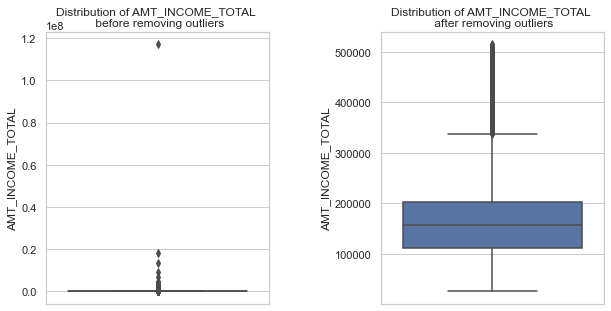

In [58]:
remove_outliers("AMT_INCOME_TOTAL")

2617 outliers removed from AMT_CREDIT.


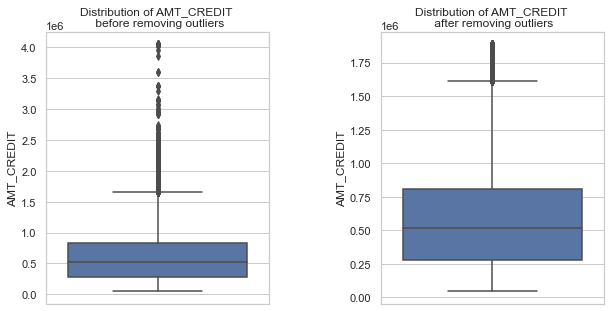

In [59]:
remove_outliers("AMT_CREDIT")

2525 outliers removed from AMT_ANNUITY.


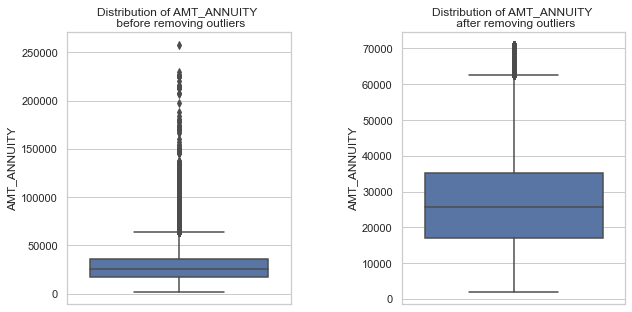

In [60]:
remove_outliers("AMT_ANNUITY")

3156 outliers removed from AMT_GOODS_PRICE.


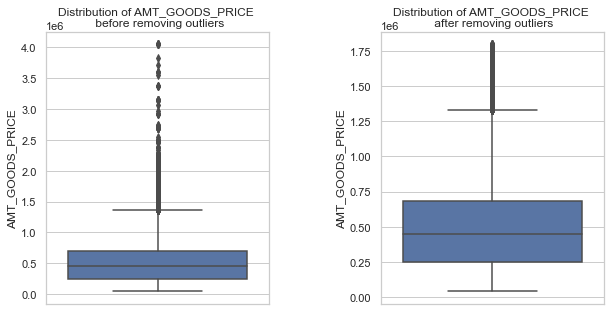

In [61]:
remove_outliers("AMT_GOODS_PRICE")

### 5. Binning of continuous variables

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [62]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
app_dt1['AMT_INCOME_RANGE'] = pd.qcut(app_dt.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_dt1['AMT_INCOME_RANGE'].head()

0    MEDIUM  
1    HIGH    
2    VERY_LOW
3    LOW     
4    LOW     
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [63]:
app_dt1['AMT_INCOME_RANGE'].value_counts()

VERY_LOW     73216
LOW          68798
MEDIUM       67509
HIGH         30007
VERY_HIGH    12607
Name: AMT_INCOME_RANGE, dtype: int64

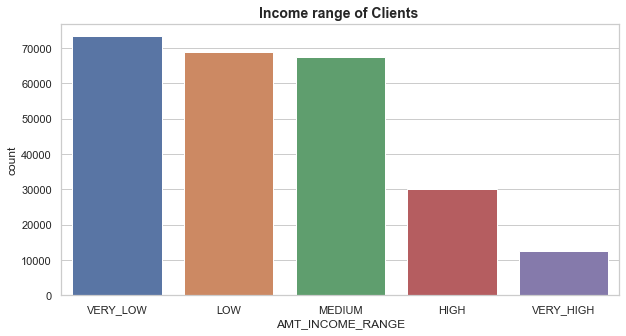

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(app_dt1["AMT_INCOME_RANGE"])
plt.title('Income range of Clients ', fontsize=14, weight='bold')
plt.show()

From the graph we conclude that majority of clients fall in 'VERY_LOW','LOW','MEDIUM' categories

In [65]:
#Binning Days of Birth
app_dt1['YEARS_BIRTH'].sort_values(ascending = True)

235444    20
73870     21
63651     21
27862     21
167777    21
          ..
8281      68
94636     68
132677    68
143266    69
172581    69
Name: YEARS_BIRTH, Length: 252137, dtype: int64

In [66]:
app_dt1["YEARS_BIRTH"].unique()

array([25, 45, 52, 54, 46, 37, 51, 39, 27, 36, 38, 23, 35, 26, 48, 31, 50,
       40, 30, 43, 28, 41, 32, 33, 47, 57, 44, 21, 55, 49, 56, 53, 42, 29,
       64, 62, 59, 34, 63, 22, 24, 58, 60, 61, 65, 67, 68, 66, 69, 20],
      dtype=int64)

In [67]:
app_dt1["YEARS_BIRTH_BINS"] = pd.cut(app_dt1["YEARS_BIRTH"],bins=[19,25,35,60,100],labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

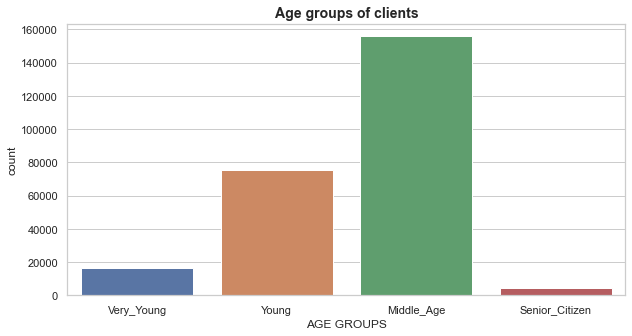

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(app_dt1["YEARS_BIRTH_BINS"])
plt.title('Age groups of clients', fontsize=14, weight='bold')
plt.xlabel('AGE GROUPS')
plt.show()

From this graph we conclude that majority of clients are in range of 25 to 50 i.e.Middle age 

### 6. Checking the distribution of data

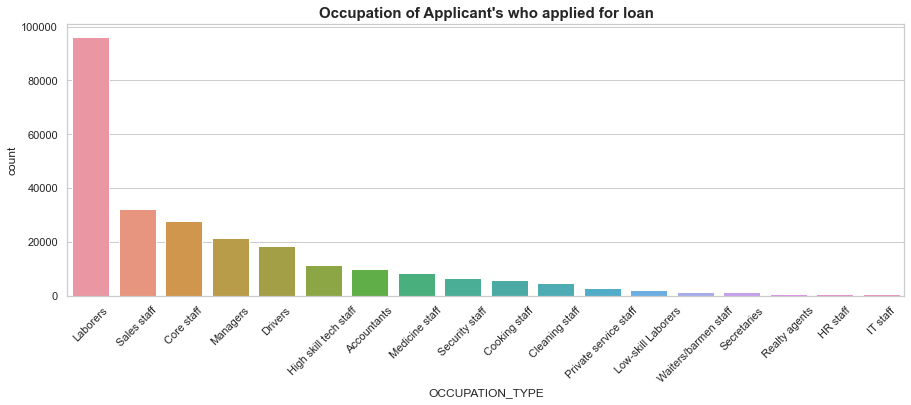

In [69]:
#Distribution of 'OCCUPATION_TYPE'
plt.figure(figsize=(15,5))
chart = sns.countplot(data=app_dt1,x='OCCUPATION_TYPE',order = app_dt1['OCCUPATION_TYPE'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Occupation of Applicant\'s who applied for loan",fontsize=15,weight='bold')
plt.show()

We can observe from the plot that Laborers,Sales staff,Core staff constitute majority where IT staff is on lower side 

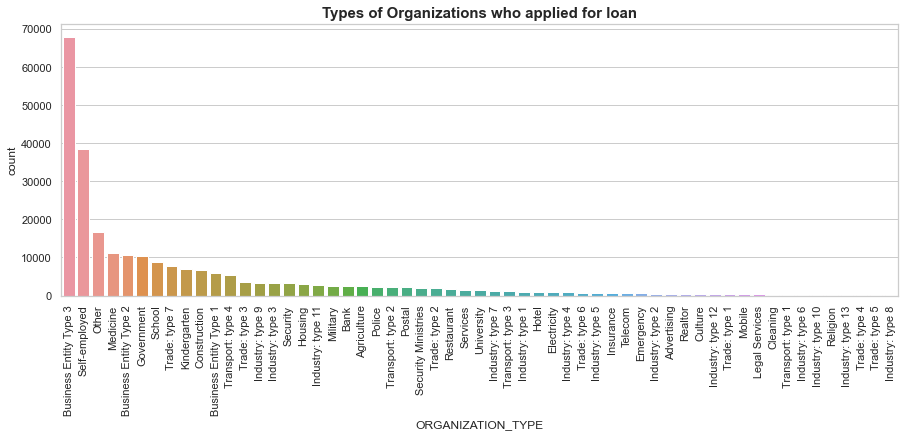

In [70]:
#Distribution of 'ORGANIZATION_TYPE'
plt.figure(figsize=(15,5))
chart = sns.countplot(data=app_dt1,x='ORGANIZATION_TYPE',order = app_dt1['ORGANIZATION_TYPE'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Types of Organizations who applied for loan",fontsize=15,weight='bold')
plt.show()

From the plot we seen that most of the clients gets loan for Business & some are self-employed.

Business Entity Type 3 organizations have majority of the loan applications.

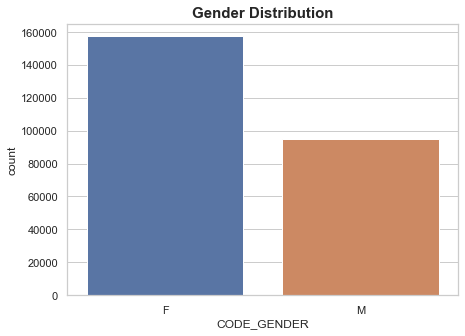

In [71]:
#Distribution of 'CODE_GENDER'
plt.figure(figsize=(7,5))
sns.countplot(data=app_dt1,x='CODE_GENDER',order = app_dt1['CODE_GENDER'].value_counts().index)
plt.title("Gender Distribution",fontsize=15,weight='bold')
plt.show()

From the Gender Distribution countplot we see majority Female clients gets the loan whether male clients are less compare to them  

### 7.Finding the data imbalance

checking the distribution of 'TARGET' variable

In [72]:
app_dt1["TARGET"].value_counts()

0    230302
1    21835 
Name: TARGET, dtype: int64

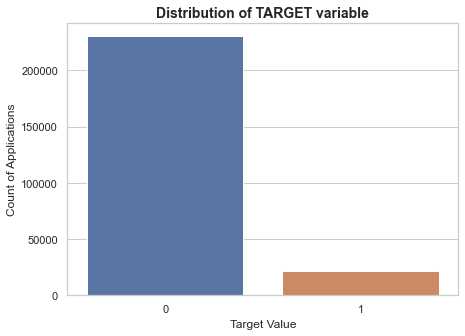

In [73]:
plt.figure(figsize=(7,5))
sns.countplot(app_dt1['TARGET'], order=app_dt1.TARGET.value_counts().index)
plt.title('Distribution of TARGET variable', fontsize=14, weight='bold')
plt.xlabel('Target Value')
plt.ylabel('Count of Applications')
plt.show()

From the plot we conclude that more than 200000 clients are without payment difficulties on the otherside  only around 22000 are clients with payment difficulties

In [74]:
# Dividing the dataset into two datasets of  target=1(client with payment difficulties) and target=0(all other)
target_0=app_dt1.loc[app_dt1["TARGET"]==0]
target_1=app_dt1.loc[app_dt1["TARGET"]==1]

In [75]:
#Finding the percentage of defaulters and non defaulters in dataset

defaulters = target_1.shape[0]/app_dt1.shape[0]*100
non_defaulters = target_0.shape[0]/app_dt1.shape[0]*100

print("The percentage of clients who paid their loan on time is %.2f" %(non_defaulters) + "%")
print("The percentage of clients who did not paid their loan on time is %.2f" %(defaulters) + "%")

The percentage of clients who paid their loan on time is 91.34%
The percentage of clients who did not paid their loan on time is 8.66%


In [76]:
# Calculating Imbalance percentage
# Since the majority is target0 and minority is target1

round(len(target_0)/len(target_1),2)

10.55

Data imbalance ratio is 10.55

**This concludes that Data is highly imbalanced** 

## 8. Univariate Analysis

### 8. 1 Univariate Analysis of categorical variables

In [77]:
app_dt1.dtypes

SK_ID_CURR                     int64   
TARGET                         int64   
NAME_CONTRACT_TYPE             object  
CODE_GENDER                    object  
FLAG_OWN_CAR                   object  
FLAG_OWN_REALTY                object  
AMT_INCOME_TOTAL               float64 
AMT_CREDIT                     float64 
AMT_ANNUITY                    float64 
AMT_GOODS_PRICE                float64 
NAME_INCOME_TYPE               object  
NAME_EDUCATION_TYPE            object  
NAME_FAMILY_STATUS             object  
NAME_HOUSING_TYPE              object  
REGION_POPULATION_RELATIVE     float64 
YEARS_BIRTH                    int64   
DAYS_EMPLOYED                  int64   
OCCUPATION_TYPE                object  
CNT_FAM_MEMBERS                float64 
REGION_RATING_CLIENT           int64   
REGION_RATING_CLIENT_W_CITY    int64   
REG_CITY_NOT_LIVE_CITY         int64   
REG_CITY_NOT_WORK_CITY         int64   
LIVE_CITY_NOT_WORK_CITY        int64   
ORGANIZATION_TYPE              object  


We'll define a function to plot graphs of each category comparing both defaulters and non-defaulters clients in data

In [78]:
def plot_categories(col,label_rotation=False, horizontal=True, values=True):
    
    if horizontal:
        f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5))
        plt.subplots_adjust(wspace=0.4)
    else:
        f, (ax1,ax2) = plt.subplots(nrows=2, figsize=(15,15))
        plt.subplots_adjust(hspace=0.5)
        
    plt.subplots_adjust(wspace=0.5)
    sns.countplot(data=target_1, x=target_1[col], ax=ax1, hue='CODE_GENDER',hue_order=['M','F'])
    ax1.set_title('''Distribution of %s \n for Defaulters''' %(col))

    sns.countplot(data=target_0, x=target_0[col], ax=ax2, hue='CODE_GENDER',hue_order=['M','F'])
    ax2.set_title('''Distribution of %s \n for Non-defaulters''' %(col))
    plt.show()

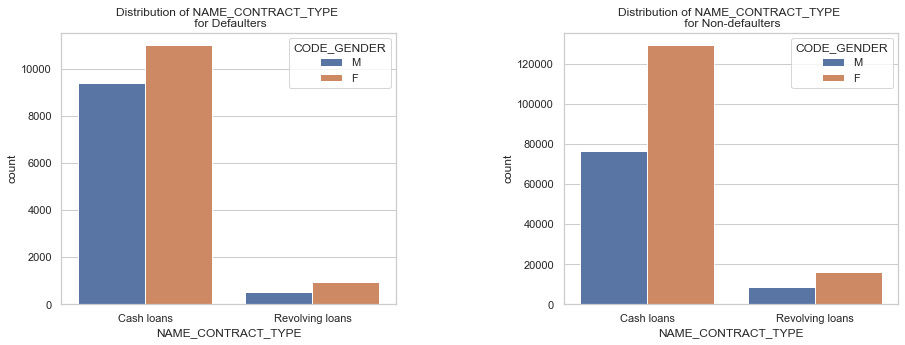

In [79]:
#Distribution of loan type
plot_categories('NAME_CONTRACT_TYPE')

- In both the cases of Defaulters and Non-defaulters Cash loans are preferred rather than revolving loans
- Female clients are leading in both the cases

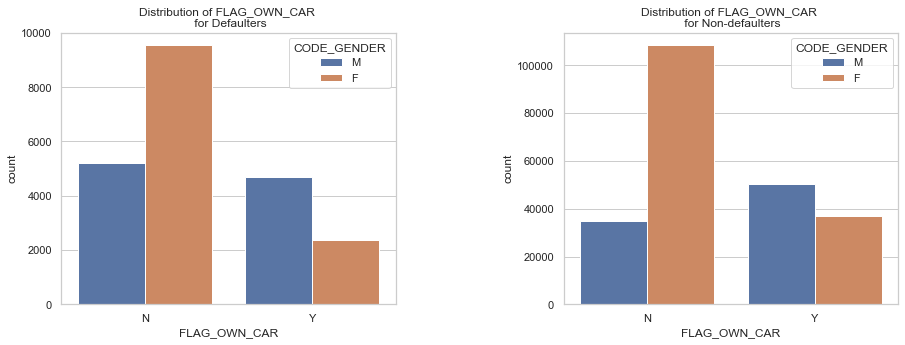

In [80]:
#Distribution of 'FLAG_OWN_CAR'
plot_categories('FLAG_OWN_CAR')

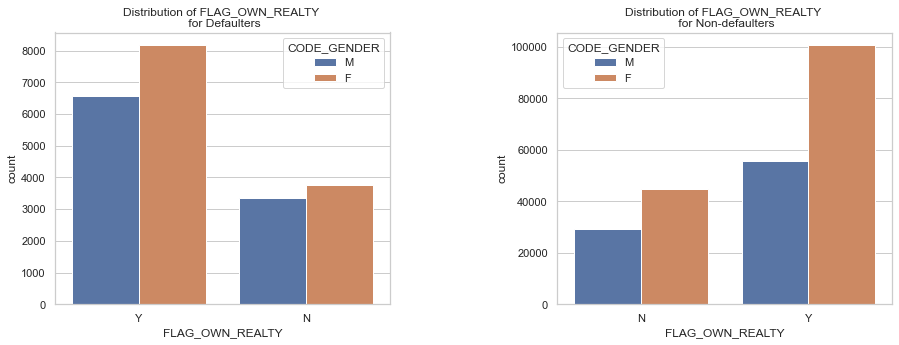

In [81]:
#Distribution of 'FLAG_OWN_REALTY'
plot_categories('FLAG_OWN_REALTY')

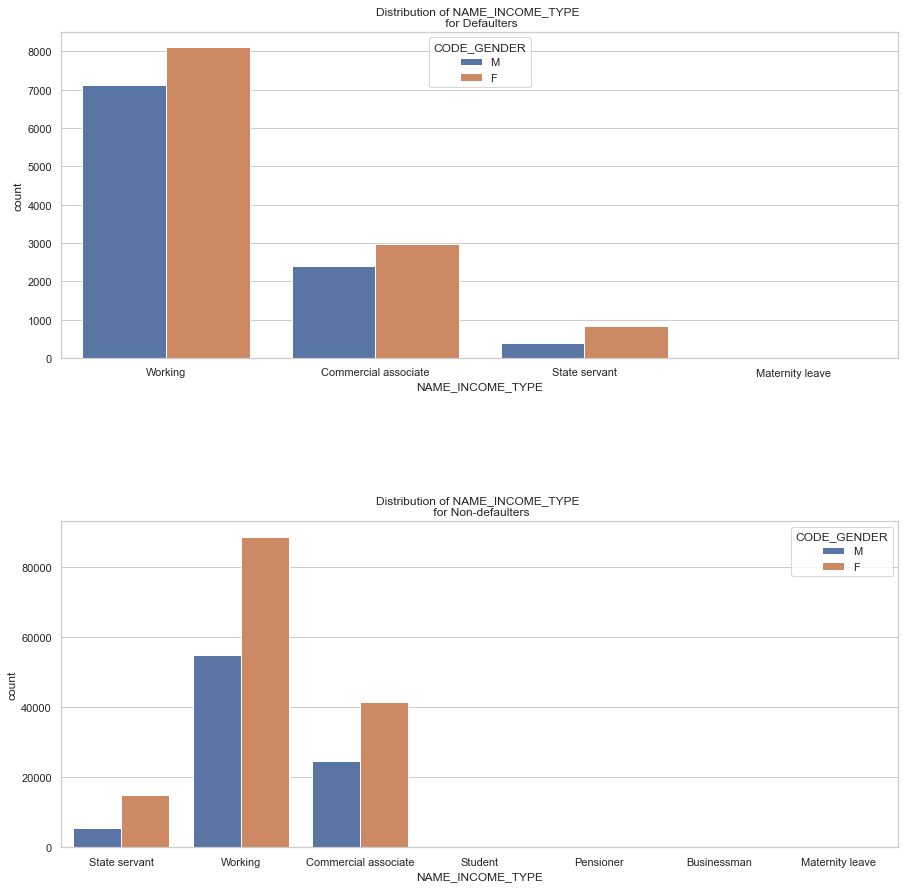

In [82]:
#Distribution of 'NAME_INCOME_TYPE'
plot_categories('NAME_INCOME_TYPE',label_rotation=True, horizontal=False, values=False)

- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of clients are higher than other i.e. ‘Maternity leave.
- We can see more female clients than male
- Although there are less number of clients for income type ‘Maternity leave’.
- In Non-defaulters there is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.


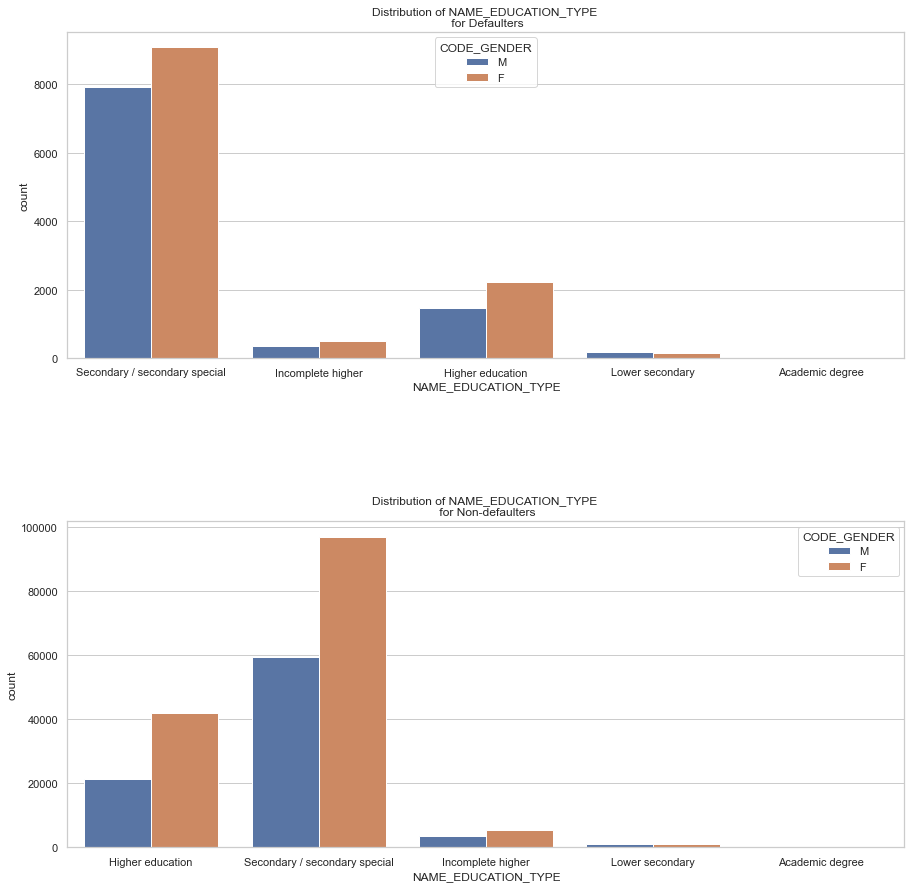

In [83]:
#Distribution of 'NAME_EDUCATION_TYPE'
plot_categories('NAME_EDUCATION_TYPE',label_rotation=True, horizontal=False, values=False)

- From the plots we can see clients with higher education and academic degree are less likely to default as compare to the secondary education

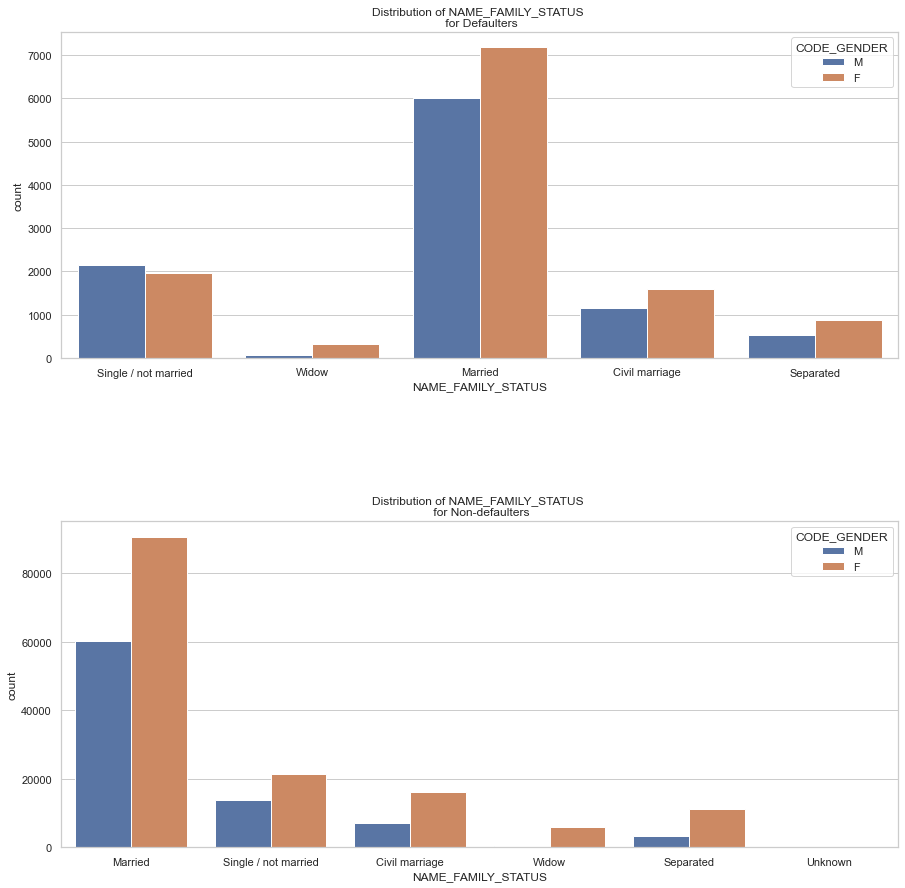

In [84]:
#Distribution of 'NAME_FAMILY_STATUS'
plot_categories('NAME_FAMILY_STATUS',label_rotation=True, horizontal=False, values=False)

- In both the cases most of the clients applied for loan are married 

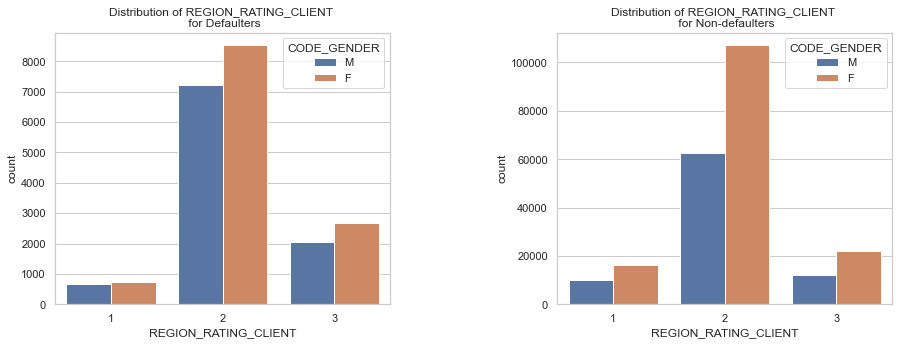

In [85]:
plot_categories('REGION_RATING_CLIENT')

 - Clients from region 2 apply for loan more likely rather than region 1 & region 3

### 8.2 Univariate analysis of numerical variables

In [86]:
def plot_numerical(col):
    
    f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,5), sharey=True)
    plt.subplots_adjust(wspace=0.4)
    
    sns.boxplot(y=target_1[col], ax=ax1, color="orange",showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax1.set_title('Distribution of %s \n for Defaulters' %(col))
    
    
    sns.boxplot(y=target_0[col], ax=ax2, color="#4CB391",showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax2.set_title('Distribution of %s \n for Non-defaulters' %(col))
    
    
    plt.show()

**AMT_INCOME_TOTAL**

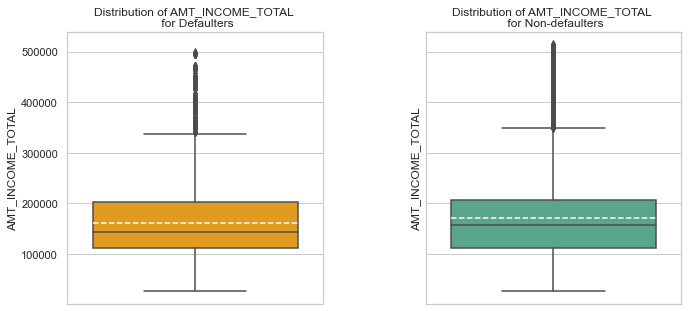

In [87]:
plot_numerical('AMT_INCOME_TOTAL')

- Some outliers are detected in income amount for Defaulters

**AMT_CREDIT**

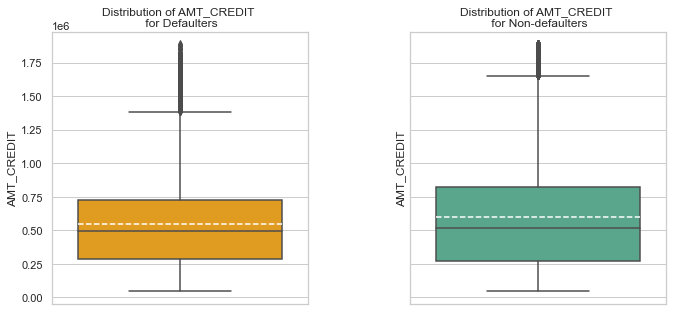

In [88]:
plot_numerical('AMT_CREDIT')

- In case of Defaulters more outliers are detected compare to Non-defaulters in AMT_CREDIT

**AMT_ANNUITY**

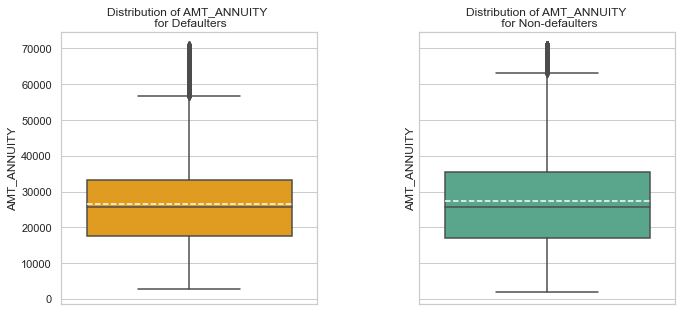

In [89]:
plot_numerical('AMT_ANNUITY')

- Some outliers are noticed in annuity amount.
- The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile

**AMT_GOODS_PRICE**

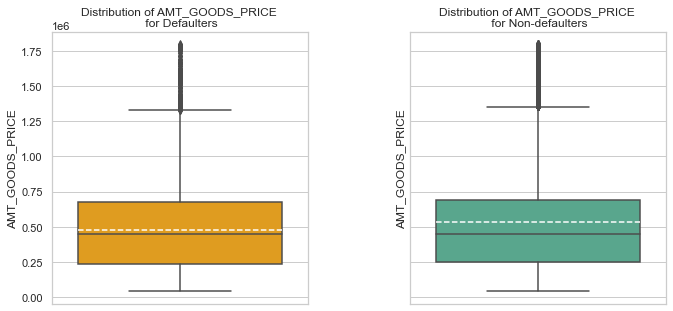

In [90]:
plot_numerical('AMT_GOODS_PRICE')

- We can observe some outliers and first quartile is bigger than third quartile

## 9. Bivariate Analysis

### 9.1 Bivariate Analysis of Categorical-Numerical Variables

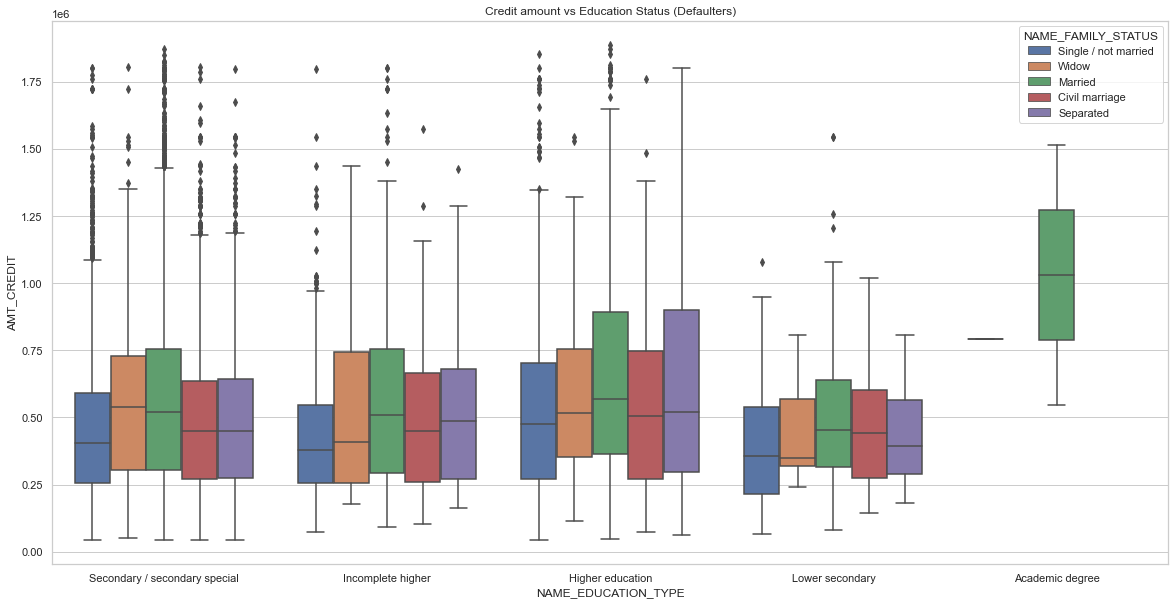

In [91]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan - Payment Difficulties (Defaulters)
plt.figure(figsize=(20,10))
plt.xticks
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS'
            ,hue_order=['Single / not married','Widow','Married','Civil marriage','Separated'],orient='v')
plt.title('Credit amount vs Education Status (Defaulters)')
plt.show()

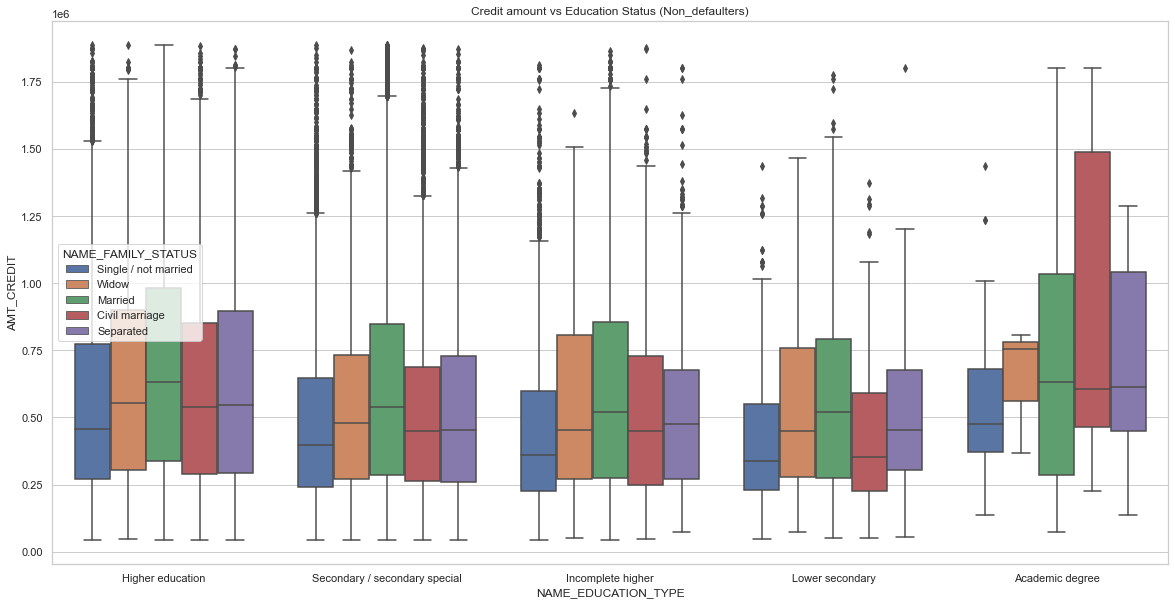

In [92]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties (Non_Defaulters)
plt.figure(figsize=(20,10))
plt.xticks
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue ='NAME_FAMILY_STATUS',
            hue_order=['Single / not married','Widow','Married','Civil marriage','Separated'],orient='v')
plt.title('Credit amount vs Education Status (Non_defaulters)')
plt.show()

The plots appears to be similar for Defaulters and Non-defaulters 
- We see most of the outliers are from Education type 'Higher education' and 'Secondary'.
- Civil marriage for Academic degree is having most of the credits in the third quartile.

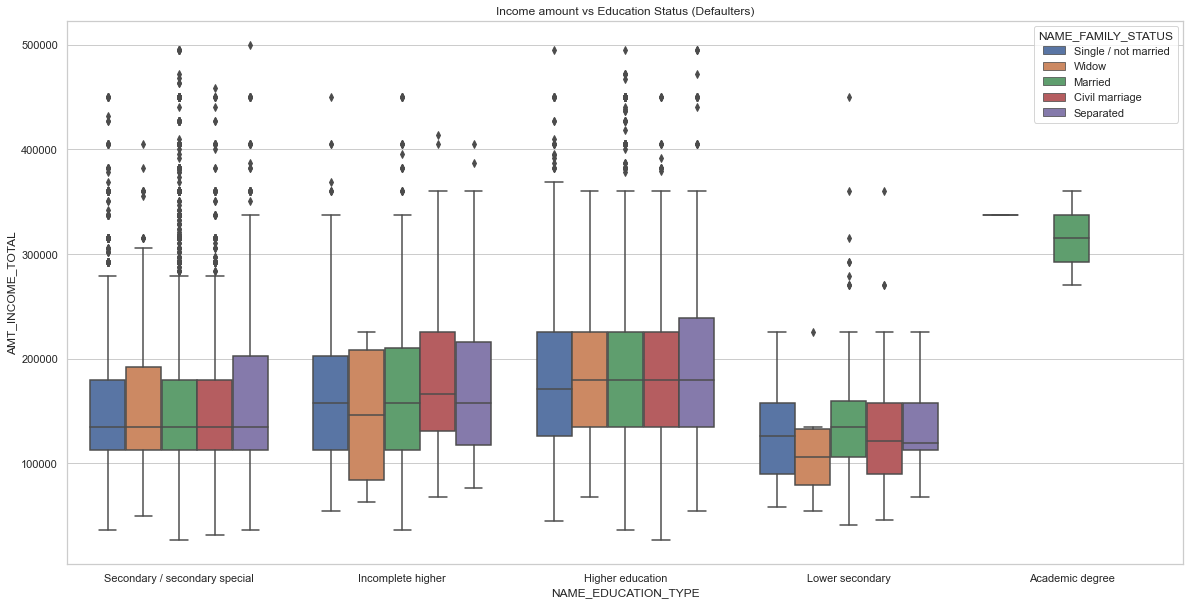

In [93]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_INCOME_TOTAL' for Loan - Payment Difficulties (Defaulters)
plt.figure(figsize=(20,10))
plt.xticks
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS'
            ,hue_order=['Single / not married','Widow','Married','Civil marriage','Separated'],orient='v')
plt.title('Income amount vs Education Status (Defaulters)')
plt.show()

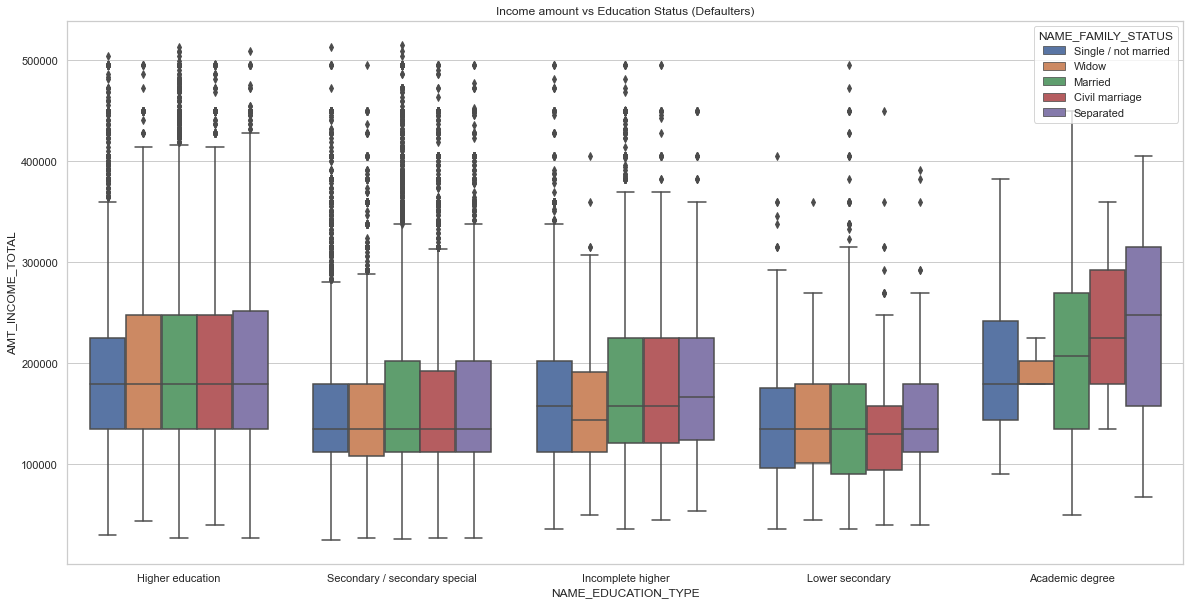

In [94]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_INCOME_TOTAL' for Loan - Payment Difficulties (Non_Defaulters)
plt.figure(figsize=(20,10))
plt.xticks
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS'
            ,hue_order=['Single / not married','Widow','Married','Civil marriage','Separated'],orient='v')
plt.title('Income amount vs Education Status (Defaulters)')
plt.show()

- From both the plots we see something similarity
- for Education type 'Higher education' the income amount is equal with family status
- Less outliers found in Academic degree. for higher education amount income total is little higher  

### 9.2 Bivariate Analysis of Numerical-Numerical Variables

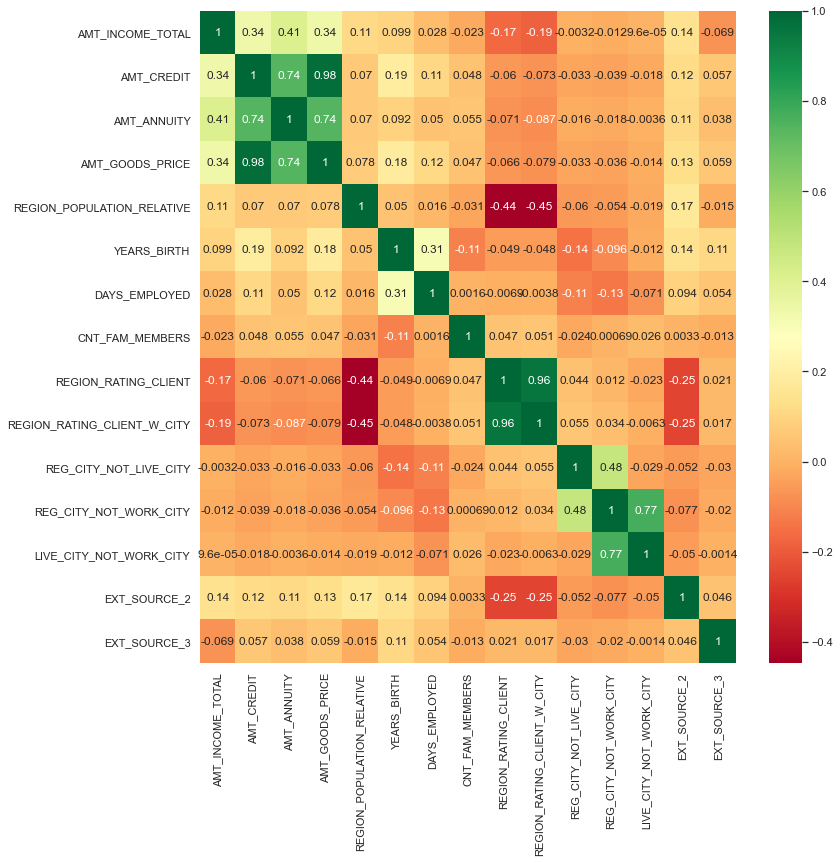

In [95]:
# Plotting the correlation heatmap for Defaulters data
plt.figure(figsize=(12,12))
def_corr = target_1.iloc[:,2:].corr()
sns.heatmap(def_corr, annot=True, cmap='RdYlGn')
plt.show()

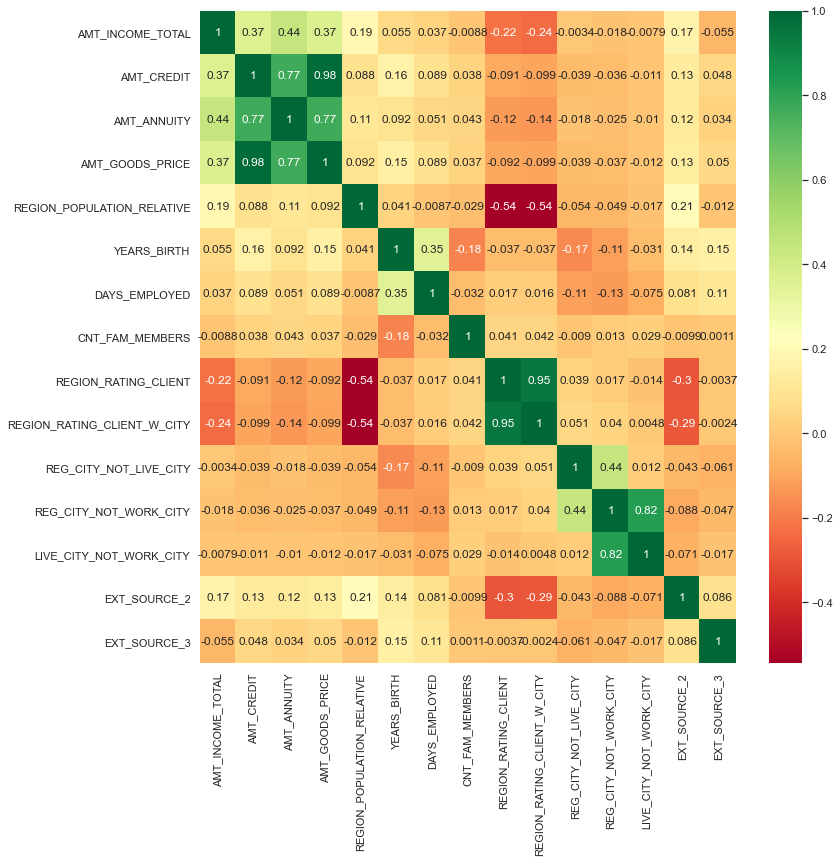

In [96]:
# Plotting the correlation heatmap for non-defaulters data
plt.figure(figsize=(12,12))
nondef_corr = target_0.iloc[:,2:].corr()
sns.heatmap(nondef_corr, annot=True, cmap='RdYlGn')
plt.show()

In [97]:
#Getting the top 10 correlation for Defaulters
def_corr = target_1.iloc[:,1:].corr()
def_corr=def_corr.where(np.triu(np.ones(def_corr.shape),k=1).astype(np.bool))
corr_df=def_corr.unstack().reset_index()

In [98]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

In [99]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
66,AMT_GOODS_PRICE,AMT_CREDIT,0.980496,0.980496
169,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956531,0.956531
220,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.768247,0.768247
50,AMT_ANNUITY,AMT_CREDIT,0.744208,0.744208
67,AMT_GOODS_PRICE,AMT_ANNUITY,0.741544,0.741544
203,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.478266,0.478266
165,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.447083,0.447083
149,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.443159,0.443159
49,AMT_ANNUITY,AMT_INCOME_TOTAL,0.409530,0.409530
65,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.341238,0.341238


The above dataframe shows top 10 correlations for clients with payment difficulties

- **From Correlation matrix we can see variables 'AMT_GOODS_PRICE'and 'AMT_CREDIT' have highest correlation between them**
- Credit amount is high for densely populated area
- Income amount is high in densely populated area

### 9.3 Bivariate Analysis of Numerical vs Numerical Variables

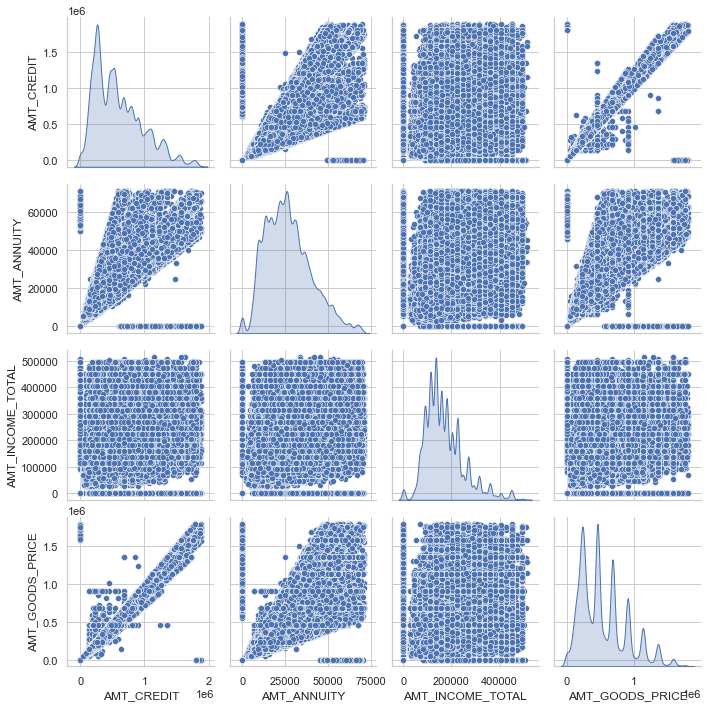

In [100]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)
pair = target_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']].fillna(0)
sns.pairplot(pair,diag_kind = 'kde')

plt.show()

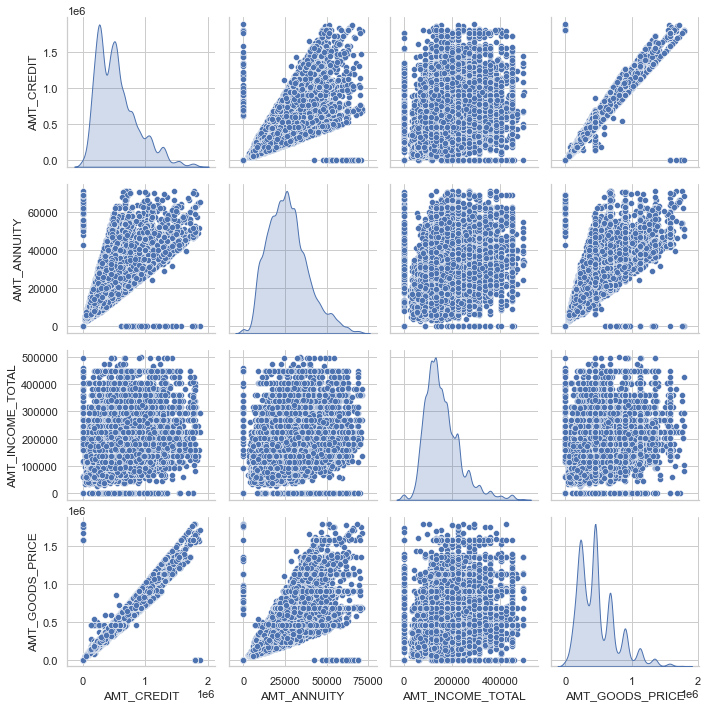

In [101]:
#Pairplot for Target 1 (Loan-Payment Difficulties)
pair = target_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']].fillna(0)
sns.pairplot(pair,diag_kind = 'kde')

plt.show()

## 10. Multivariate Analysis

### Multivariate analysis on 2 categorical variables and target

In [102]:
# Defining function for plotting heatmap for multivariate analysis of 2 categorical variables and TARGET
def multi_heatmap(df, a, b, large=False):
    if large:
        plt.figure(figsize=(15,15))
    res = pd.pivot_table(data=df,index=a,columns=b,values='TARGET')
    sns.heatmap(res,annot=True,cmap='RdYlGn')
    plt.show()

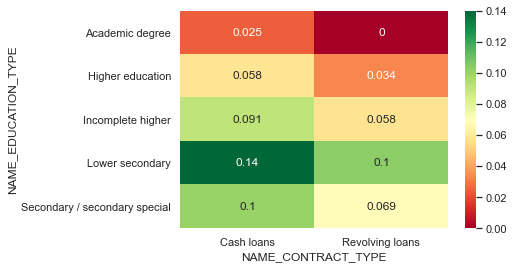

In [103]:
multi_heatmap(app_dt1,'NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE')

From the plot we see people with Education type Lower secondary are more likely to default

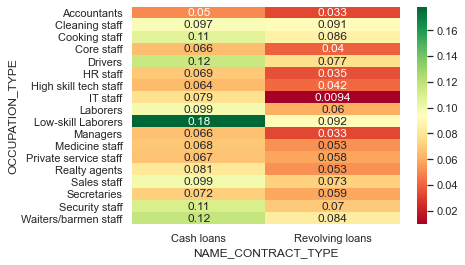

In [104]:
multi_heatmap(app_dt1,'OCCUPATION_TYPE','NAME_CONTRACT_TYPE')

Low skill Laborers who take cash loans are more likely to default

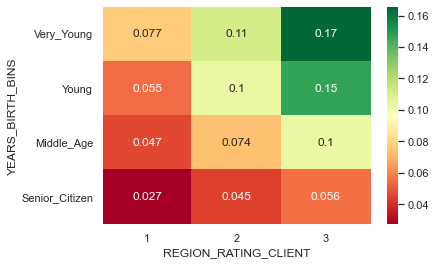

In [105]:
multi_heatmap(app_dt1,'YEARS_BIRTH_BINS','REGION_RATING_CLIENT')

Very_Young and Young Categories People are more likely to default

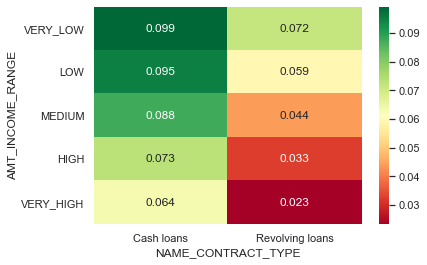

In [106]:
multi_heatmap(app_dt1,'AMT_INCOME_RANGE','NAME_CONTRACT_TYPE')

Clients having income range 'VERY_LOW' , 'LOW' are likely to default

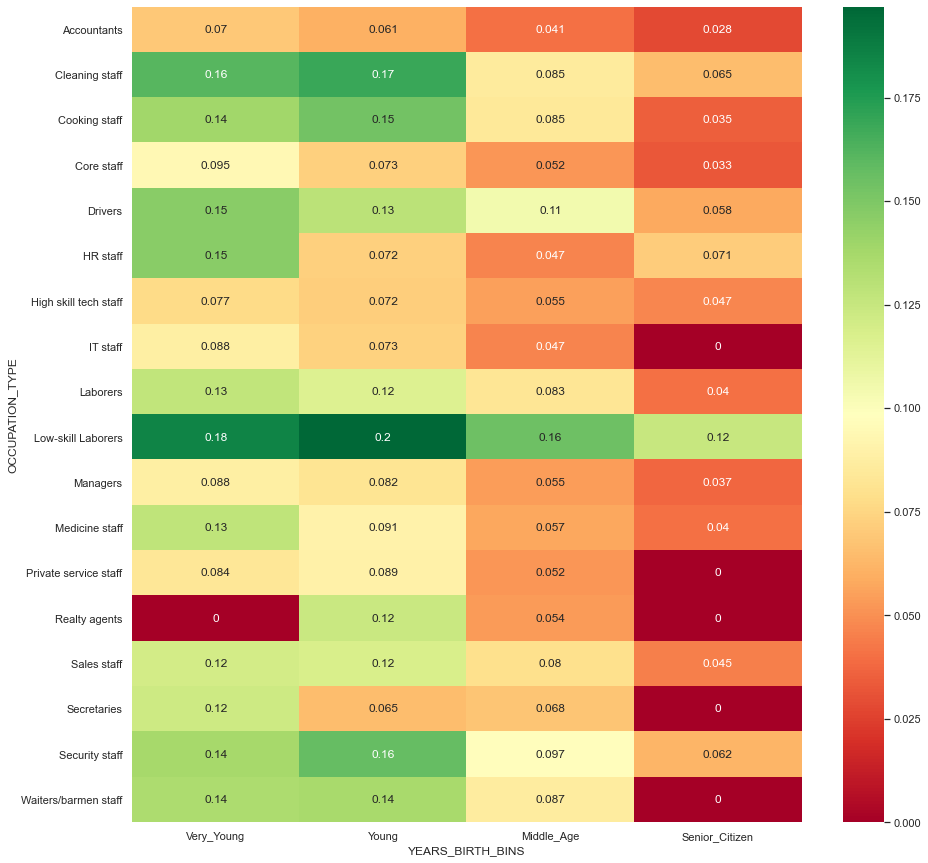

In [107]:
multi_heatmap(app_dt1,'OCCUPATION_TYPE','YEARS_BIRTH_BINS',True)

- Very_Young, Young category people where OCCUPATION_TYPE is 'Low-skill Laborers','Cleaning Staff','Cooking Staff','Drivers' are more likely to default

## Data Analysis on Previous Application data

### 1. Reading the dataset

In [108]:
pre_app = pd.read_csv(r"C:\Users\SANKET\Desktop\Sanket Bhuwad Upgrad\Course I - Data Toolkit\Credit EDA Case Study\previous_application.csv")
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,0.000000,17145.000000,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000000,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.000000
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,NaN,607500.000000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000000,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.000000
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,NaN,112500.000000,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,high,Cash X-Sell: high,365243.000000,-271.000000,59.000000,365243.000000,365243.000000,1.000000
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,NaN,450000.000000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,middle,Cash X-Sell: middle,365243.000000,-482.000000,-152.000000,-182.000000,-177.000000,1.000000
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,NaN,337500.000000,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
pre_app.shape

(1670214, 37)

In [110]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [111]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.000000,1670214.000000,1297979.000000,1670214.000000,1670213.000000,774370.000000,1284699.000000,1670214.000000,1670214.000000,774370.000000,5951.000000,5951.000000,1670214.000000,1670214.000000,1297984.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1923089.135331,278357.174099,15955.120659,175233.860360,196114.021218,6697.402139,227847.279283,12.484182,0.996468,0.079637,0.188357,0.773503,-880.679668,313.951115,16.054082,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,532597.958696,102814.823849,14782.137335,292779.762387,318574.616546,20921.495410,315396.557937,3.334028,0.059330,0.107823,0.087671,0.100879,779.099667,7127.443459,14.567288,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1000001.000000,100001.000000,0.000000,0.000000,0.000000,-0.900000,0.000000,0.000000,0.000000,-0.000015,0.034781,0.373150,-2922.000000,-1.000000,0.000000,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1461857.250000,189329.000000,6321.780000,18720.000000,24160.500000,0.000000,50841.000000,10.000000,1.000000,0.000000,0.160716,0.715645,-1300.000000,-1.000000,6.000000,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1923110.500000,278714.500000,11250.000000,71046.000000,80541.000000,1638.000000,112320.000000,12.000000,1.000000,0.051605,0.189122,0.835095,-581.000000,3.000000,12.000000,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2384279.750000,367514.000000,20658.420000,180360.000000,216418.500000,7740.000000,234000.000000,15.000000,1.000000,0.108909,0.193330,0.852537,-280.000000,82.000000,24.000000,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2845382.000000,456255.000000,418058.145000,6905160.000000,6905160.000000,3060045.000000,6905160.000000,23.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,4000000.000000,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [112]:
# Checking for null values
pre_app.isnull().sum()

SK_ID_PREV                     0      
SK_ID_CURR                     0      
NAME_CONTRACT_TYPE             0      
AMT_ANNUITY                    372235 
AMT_APPLICATION                0      
AMT_CREDIT                     1      
AMT_DOWN_PAYMENT               895844 
AMT_GOODS_PRICE                385515 
WEEKDAY_APPR_PROCESS_START     0      
HOUR_APPR_PROCESS_START        0      
FLAG_LAST_APPL_PER_CONTRACT    0      
NFLAG_LAST_APPL_IN_DAY         0      
RATE_DOWN_PAYMENT              895844 
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE         0      
NAME_CONTRACT_STATUS           0      
DAYS_DECISION                  0      
NAME_PAYMENT_TYPE              0      
CODE_REJECT_REASON             0      
NAME_TYPE_SUITE                820405 
NAME_CLIENT_TYPE               0      
NAME_GOODS_CATEGORY            0      
NAME_PORTFOLIO                 0      
NAME_PRODUCT_TYPE              0      
CHANNEL_TYPE             

In [113]:
null_perc = pre_app.isnull().sum()/len(pre_app)*100

In [114]:
null_perc.sort_values(ascending = False).head(16)

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
NAME_TYPE_SUITE             49.119754
NFLAG_INSURED_ON_APPROVAL   40.298129
DAYS_TERMINATION            40.298129
DAYS_LAST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION   40.298129
DAYS_FIRST_DUE              40.298129
DAYS_FIRST_DRAWING          40.298129
AMT_GOODS_PRICE             23.081773
AMT_ANNUITY                 22.286665
CNT_PAYMENT                 22.286366
PRODUCT_COMBINATION         0.020716 
AMT_CREDIT                  0.000060 
dtype: float64

In [115]:
# List of columns where null values percentange count is more than 40%
null_col = pre_app.isnull().sum()
null_col = null_col[null_col.values>(0.4*len(pre_app))]
len(null_col)

11

Removing 11 columns have null values more than 40%

In [116]:
# Remove the columns where null values percentage is more than 40%
null_col = list(null_col[null_col.values>=0.4].index)
pre_app.drop(null_col,axis=1,inplace=True)

In [117]:
#checking shape of dataframe again
pre_app.shape

(1670214, 26)

In [118]:
null = pre_app.isnull().sum()/len(pre_app)*100
null.sort_values(ascending = False).head()

AMT_GOODS_PRICE       23.081773
AMT_ANNUITY           22.286665
CNT_PAYMENT           22.286366
PRODUCT_COMBINATION   0.020716 
AMT_CREDIT            0.000060 
dtype: float64

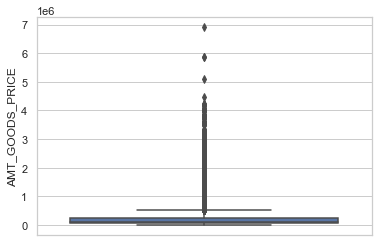

In [119]:
sns.boxplot(y=pre_app["AMT_GOODS_PRICE"])
plt.show()

We can see outliers in "AMT_GOODS_PRICE"

For the column 'AMT_GOODS_PRICE', we can impute the missing values with the median, which is the value '112320'

In [120]:
pre_app["AMT_GOODS_PRICE"].value_counts()

45000.000000     47831
225000.000000    43549
135000.000000    40666
450000.000000    38926
90000.000000     29367
                 ...  
431977.500000    1    
309064.500000    1    
142870.500000    1    
34421.400000     1    
84384.270000     1    
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [121]:
pre_app["AMT_GOODS_PRICE"].median()

112320.0

In [122]:
pre_app['AMT_GOODS_PRICE'].fillna(pre_app['AMT_GOODS_PRICE'].median(),inplace=True)

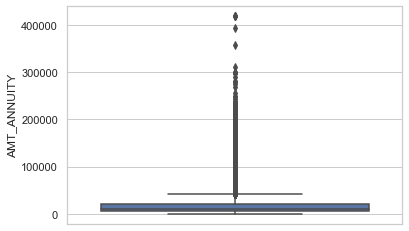

In [123]:
sns.boxplot(y=pre_app["AMT_ANNUITY"])
plt.show()

For the column 'AMT_ANNUITY', we can impute the missing values with the median, which is the value '11250'

In [124]:
pre_app["AMT_ANNUITY"].median()

11250.0

In [125]:
pre_app['AMT_ANNUITY'].fillna(pre_app['AMT_ANNUITY'].median(),inplace=True)

In [126]:
pre_app["CNT_PAYMENT"].describe()

count   1297984.000000
mean    16.054082     
std     14.567288     
min     0.000000      
25%     6.000000      
50%     12.000000     
75%     24.000000     
max     84.000000     
Name: CNT_PAYMENT, dtype: float64

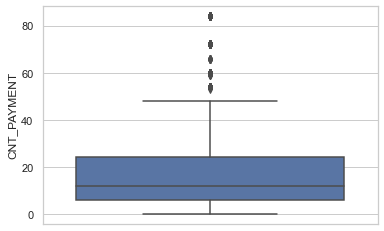

In [127]:
sns.boxplot(y=pre_app["CNT_PAYMENT"])
plt.show()

For the column 'CNT_PAYMENT', we can impute the missing values with the median, which is the value '12'

In [128]:
pre_app['CNT_PAYMENT'].median()

12.0

In [129]:
pre_app['CNT_PAYMENT'].fillna(pre_app['CNT_PAYMENT'].median(),inplace=True)

In [130]:
pre_app['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest        98833 
POS household without interest    82908 
Card X-Sell                       80582 
Cash Street: high                 59639 
Cash X-Sell: high                 59301 
Cash Street: middle               34658 
Cash Street: low                  33834 
POS mobile without interest       24082 
POS other with interest           23879 
POS industry without interest     12602 
POS others without interest       2555  
Name: PRODUCT_COMBINATION, dtype: int64

For the column 'PRODUCT_COMBINATION',which is categorical we can impute the missing values with the mode, which is 'Cash'

In [131]:
pre_app['PRODUCT_COMBINATION'].mode()

0    Cash
dtype: object

In [132]:
pre_app['PRODUCT_COMBINATION'].fillna(pre_app['PRODUCT_COMBINATION'].mode(),inplace=True)

In [133]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,17145.000000,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000000,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,607500.000000,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000000,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,112500.000000,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,450000.000000,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,337500.000000,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000000,high,Cash Street: high


In [134]:
# changing the negative values in the column 'DAYS_DECISION'
filter_col = [col for col in pre_app if col.startswith('DAYS')]
pre_app[filter_col]= abs(pre_app[filter_col])

In [135]:
pre_app['DAYS_DECISION'].value_counts()

245     2444
238     2390
210     2375
273     2350
196     2315
        ... 
2882    163 
2922    162 
2921    158 
2902    148 
1       2   
Name: DAYS_DECISION, Length: 2922, dtype: int64

There are some null values in columns such as XNA and XAP

In [136]:
# Replacing XNA and XAP by NaN
pre_app=pre_app.replace('XNA', np.NaN)
pre_app=pre_app.replace('XAP', np.NaN)

### 2. Univariate Analysis

In [137]:
#Value counts of Contract Status in previous application
pre_app['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled        316319 
Refused         290678 
Unused offer    26436  
Name: NAME_CONTRACT_STATUS, dtype: int64

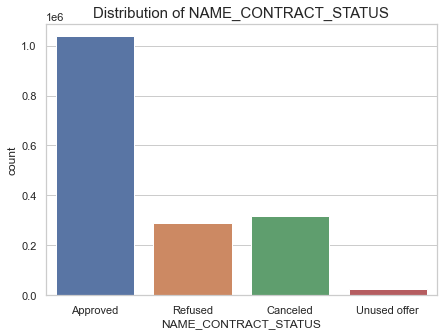

In [138]:
plt.figure(figsize=(7,5))
chart = sns.countplot(x='NAME_CONTRACT_STATUS', data=pre_app)
chart.set_title(f'Distribution of NAME_CONTRACT_STATUS',fontsize=15)

plt.show()

In [139]:
# Percentage of applications based on their contract status
pre_app['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved       62.074740
Canceled       18.938831
Refused        17.403638
Unused offer   1.582791 
Name: NAME_CONTRACT_STATUS, dtype: float64

In [140]:
# Function of countplot for categorical variables
def plot_uni(var):

    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=pre_app,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")
    
    plt.show()

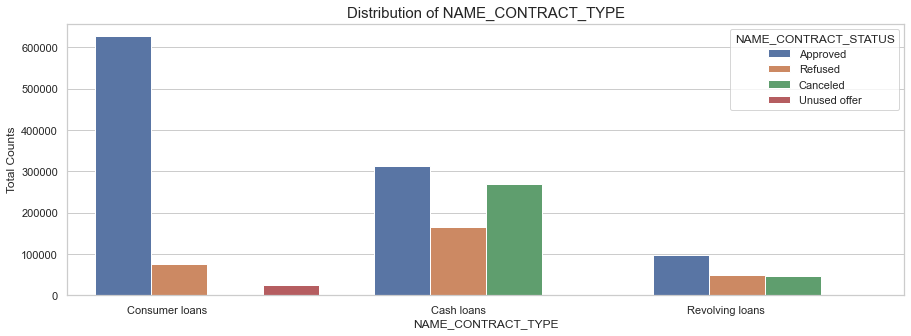

In [141]:
plot_uni('NAME_CONTRACT_TYPE')

From the plot we can see most of the clients apply for 'Cash loans' and 'Consumer Loans'.'Cash loans' are refused compare to 'Consumer loans' and 'Revolving loans'

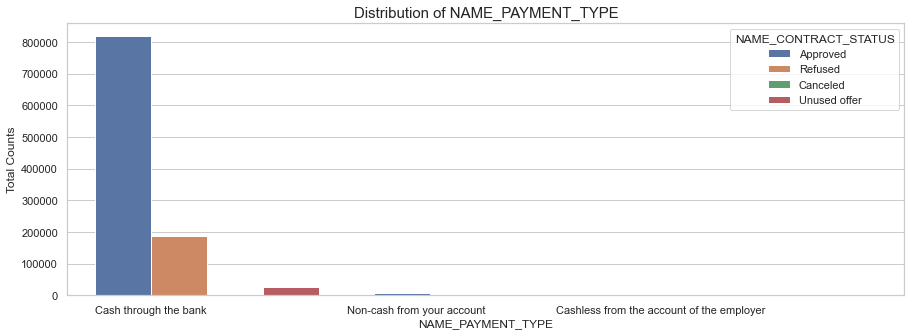

In [142]:
plot_uni('NAME_PAYMENT_TYPE')

- From the plot we can see most of the clients choose to repay the loan using 'Cash through the bank' option.
- 'Non-cash from your account','Cashless from the account of the employer' this options are not that much preffered

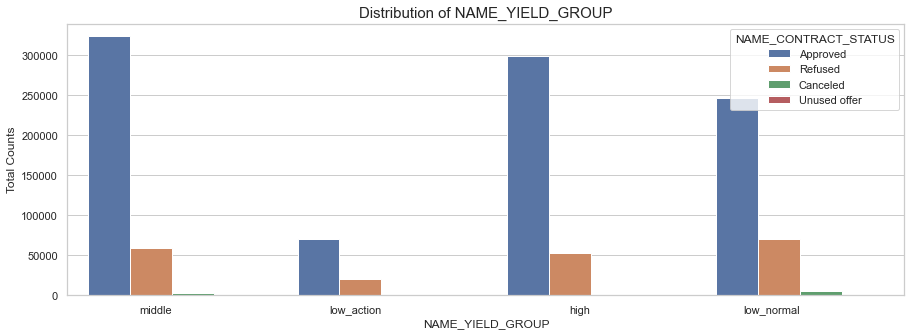

In [143]:
plot_uni('NAME_YIELD_GROUP')

- From middle group majority applications are approved
- From low_normal group majority applications are 'Refused','Canceled'

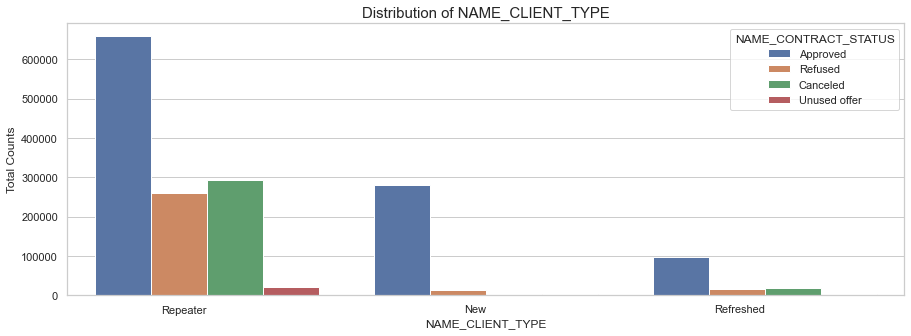

In [144]:
plot_uni('NAME_CLIENT_TYPE')

Most of the clients are Repeaters and they refused most oftenly

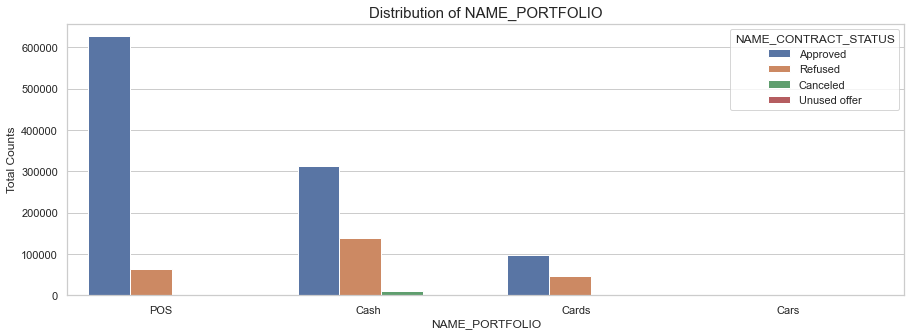

In [145]:
plot_uni('NAME_PORTFOLIO')

- Most of the clients applied for POS loans and they got approved
- Cash loan constitutes majority of the cancelled and refused applications.

### 3. Checking the correlation in previous_application dataset

In [146]:
#Top 10 correlation for Previous Application
corr=pre_app.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
58,AMT_GOODS_PRICE,AMT_APPLICATION,0.987143,0.987143
47,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
59,AMT_GOODS_PRICE,AMT_CREDIT,0.971117,0.971117
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.816293,0.816293
46,AMT_CREDIT,AMT_ANNUITY,0.811670,0.811670
35,AMT_APPLICATION,AMT_ANNUITY,0.805558,0.805558
113,CNT_PAYMENT,AMT_APPLICATION,0.681114,0.681114
115,CNT_PAYMENT,AMT_GOODS_PRICE,0.676007,0.676007
114,CNT_PAYMENT,AMT_CREDIT,0.674387,0.674387
112,CNT_PAYMENT,AMT_ANNUITY,0.406187,0.406187


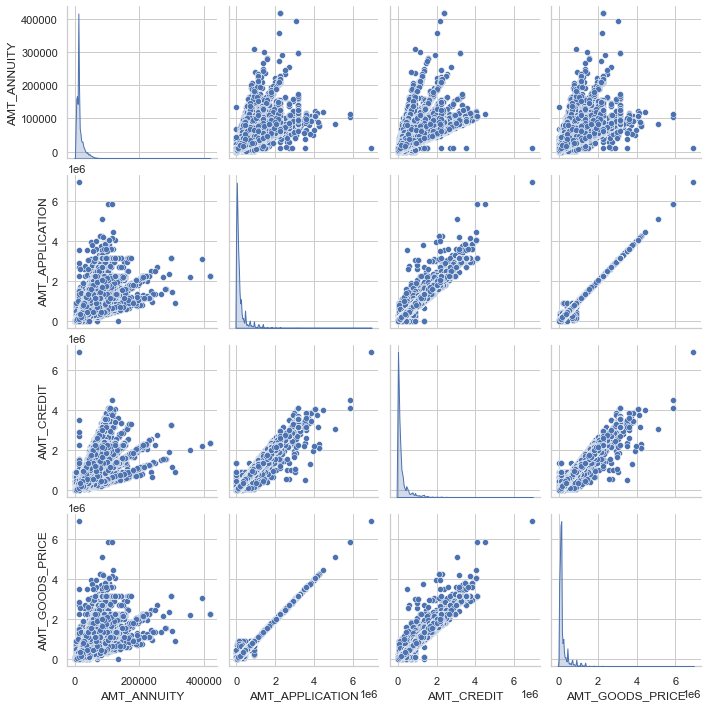

In [147]:
#plotting the relation between highly correlated numeric vriables
pair = pre_app[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']]
sns.pairplot(pair,diag_kind = 'kde')

plt.show()

### 4. Analysing status of previous application and the current application

In [148]:
# Generating a pivot table from pre dataframe based on the count of contract status
app_status = pre_app.pivot_table(values='SK_ID_PREV', columns='NAME_CONTRACT_STATUS', index='SK_ID_CURR', aggfunc='count')
app_status.fillna(0, inplace=True)
app_status.head()

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
SK_ID_CURR,,,,
100001,1.000000,0.000000,0.000000,0.000000
100002,1.000000,0.000000,0.000000,0.000000
100003,3.000000,0.000000,0.000000,0.000000
100004,1.000000,0.000000,0.000000,0.000000
100005,1.000000,1.000000,0.000000,0.000000


We are using left join on SK_ID_CURR from our app_dt1

In [149]:
# Merging the pivot table with the app data
status_df = pd.merge(app_dt1, app_status, how='left', on='SK_ID_CURR')
status_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_RANGE,YEARS_BIRTH_BINS,Approved,Canceled,Refused,Unused offer
0,100002,1,Cash loans,M,N,Y,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,Laborers,1.000000,2,2,0,0,0,Business Entity Type 3,0.262949,0.139376,MEDIUM,Very_Young,1.000000,0.000000,0.000000,0.000000
1,100003,0,Cash loans,F,N,N,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,45,1188,Core staff,2.000000,1,1,0,0,0,School,0.622246,0.510853,HIGH,Middle_Age,3.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,Laborers,1.000000,2,2,0,0,0,Government,0.555912,0.729567,VERY_LOW,Middle_Age,1.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,Laborers,2.000000,2,2,0,0,0,Business Entity Type 3,0.650442,0.510853,LOW,Middle_Age,5.000000,3.000000,1.000000,0.000000
4,100007,0,Cash loans,M,N,Y,121500.000000,513000.000000,21865.500000,513000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,Core staff,1.000000,2,2,0,1,1,Religion,0.322738,0.510853,LOW,Middle_Age,6.000000,0.000000,0.000000,0.000000


In [150]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 252136
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   252137 non-null  int64   
 1   TARGET                       252137 non-null  int64   
 2   NAME_CONTRACT_TYPE           252137 non-null  object  
 3   CODE_GENDER                  252137 non-null  object  
 4   FLAG_OWN_CAR                 252137 non-null  object  
 5   FLAG_OWN_REALTY              252137 non-null  object  
 6   AMT_INCOME_TOTAL             249604 non-null  float64 
 7   AMT_CREDIT                   249520 non-null  float64 
 8   AMT_ANNUITY                  249612 non-null  float64 
 9   AMT_GOODS_PRICE              248981 non-null  float64 
 10  NAME_INCOME_TYPE             252137 non-null  object  
 11  NAME_EDUCATION_TYPE          252137 non-null  object  
 12  NAME_FAMILY_STATUS           252137 non-null

In [151]:
status_df.isnull().sum()

SK_ID_CURR                     0    
TARGET                         0    
NAME_CONTRACT_TYPE             0    
CODE_GENDER                    0    
FLAG_OWN_CAR                   0    
FLAG_OWN_REALTY                0    
AMT_INCOME_TOTAL               2533 
AMT_CREDIT                     2617 
AMT_ANNUITY                    2525 
AMT_GOODS_PRICE                3156 
NAME_INCOME_TYPE               0    
NAME_EDUCATION_TYPE            0    
NAME_FAMILY_STATUS             0    
NAME_HOUSING_TYPE              0    
REGION_POPULATION_RELATIVE     0    
YEARS_BIRTH                    0    
DAYS_EMPLOYED                  0    
OCCUPATION_TYPE                0    
CNT_FAM_MEMBERS                2    
REGION_RATING_CLIENT           0    
REGION_RATING_CLIENT_W_CITY    0    
REG_CITY_NOT_LIVE_CITY         0    
REG_CITY_NOT_WORK_CITY         0    
LIVE_CITY_NOT_WORK_CITY        0    
ORGANIZATION_TYPE              0    
EXT_SOURCE_2                   0    
EXT_SOURCE_3                   0    
A

We can see 13669 previous applicants are missing for current applicants.

## 4. Multivariate analysis 

In [152]:
# Creating pivot table previous application data using the amounts involved
amt_pre = pre_app.pivot_table(values=['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT','AMT_GOODS_PRICE'], 
                          index=['SK_ID_CURR','NAME_CONTRACT_STATUS'], aggfunc='mean')
amt_pre.reset_index(inplace=True)

In [153]:
# Merging amt_pre with app dataframe
app_pre = pd.merge(app_dt1, amt_pre, how='left', on='SK_ID_CURR', suffixes=('_APP,','_PRE'))
app_pre.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,"AMT_CREDIT_APP,","AMT_ANNUITY_APP,","AMT_GOODS_PRICE_APP,",NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_RANGE,YEARS_BIRTH_BINS,NAME_CONTRACT_STATUS,AMT_ANNUITY_PRE,AMT_APPLICATION,AMT_CREDIT_PRE,AMT_GOODS_PRICE_PRE
0,100002,1,Cash loans,M,N,Y,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,Laborers,1.000000,2,2,0,0,0,Business Entity Type 3,0.262949,0.139376,MEDIUM,Very_Young,Approved,9251.775000,179055.000000,179055.000000,179055.000000
1,100003,0,Cash loans,F,N,N,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,45,1188,Core staff,2.000000,1,1,0,0,0,School,0.622246,0.510853,HIGH,Middle_Age,Approved,56553.990000,435436.500000,484191.000000,435436.500000
2,100004,0,Revolving loans,M,Y,Y,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,Laborers,1.000000,2,2,0,0,0,Government,0.555912,0.729567,VERY_LOW,Middle_Age,Approved,5357.250000,24282.000000,20106.000000,24282.000000
3,100006,0,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,Laborers,2.000000,2,2,0,0,0,Business Entity Type 3,0.650442,0.510853,LOW,Middle_Age,Approved,21842.190000,352265.868000,343728.900000,352265.868000
4,100006,0,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,Laborers,2.000000,2,2,0,0,0,Business Entity Type 3,0.650442,0.510853,LOW,Middle_Age,Canceled,11250.000000,0.000000,0.000000,112320.000000


In [154]:
app_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439217 entries, 0 to 439216
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   439217 non-null  int64   
 1   TARGET                       439217 non-null  int64   
 2   NAME_CONTRACT_TYPE           439217 non-null  object  
 3   CODE_GENDER                  439217 non-null  object  
 4   FLAG_OWN_CAR                 439217 non-null  object  
 5   FLAG_OWN_REALTY              439217 non-null  object  
 6   AMT_INCOME_TOTAL             434990 non-null  float64 
 7   AMT_CREDIT_APP,              435508 non-null  float64 
 8   AMT_ANNUITY_APP,             435151 non-null  float64 
 9   AMT_GOODS_PRICE_APP,         434627 non-null  float64 
 10  NAME_INCOME_TYPE             439217 non-null  object  
 11  NAME_EDUCATION_TYPE          439217 non-null  object  
 12  NAME_FAMILY_STATUS           439217 non-null

### Income Range vs Previous Application Status

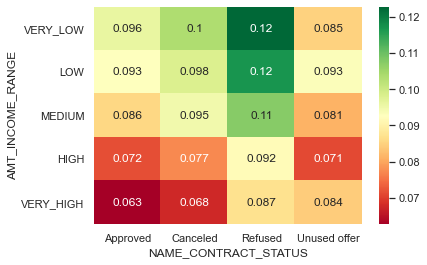

In [155]:
multi_heatmap(app_pre,'AMT_INCOME_RANGE','NAME_CONTRACT_STATUS')

Clients are more likely to default whose previous application is canceled or refused

### Housing Type vs Contract Status

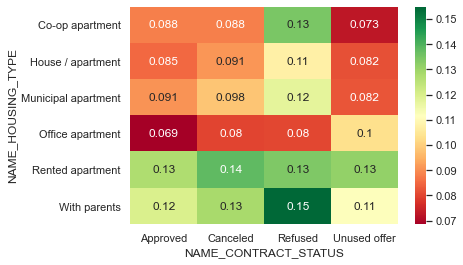

In [156]:
multi_heatmap(app_pre,'NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')

people who live in office apartments whose previous application was approved are less likely to default. bank can use this information to reduce their default rate

### Region Rating vs Contract Status


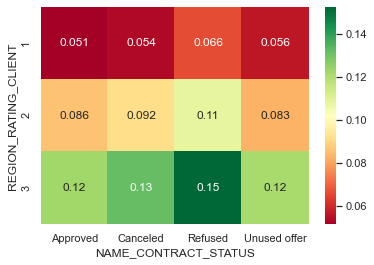

In [157]:
multi_heatmap(app_pre,'REGION_RATING_CLIENT','NAME_CONTRACT_STATUS')

Clients from region 3 are more likely to default

## Insights

Based on our analysis we found variables which we need to consider during offering loan

- REGION_RATING_CLIENT
- AMT_INCOME_TOTAL
- OCCUPATION_TYPE
- NAME_EDUCATION_TYPE
- YEARS BIRTH
- NAME_INCOME_TYPE

### Credit EDA Case Study by SANKET BHUWAD

### IIIT B DS C37